<a href="https://colab.research.google.com/github/UpendraThota/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

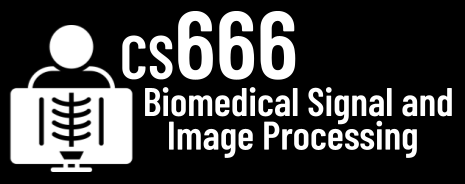
#Assignment 5

In [1]:
# NAME:THOTA UPENDRA

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.5 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: Based on the data under the "ct" folder there are 220 slices.

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

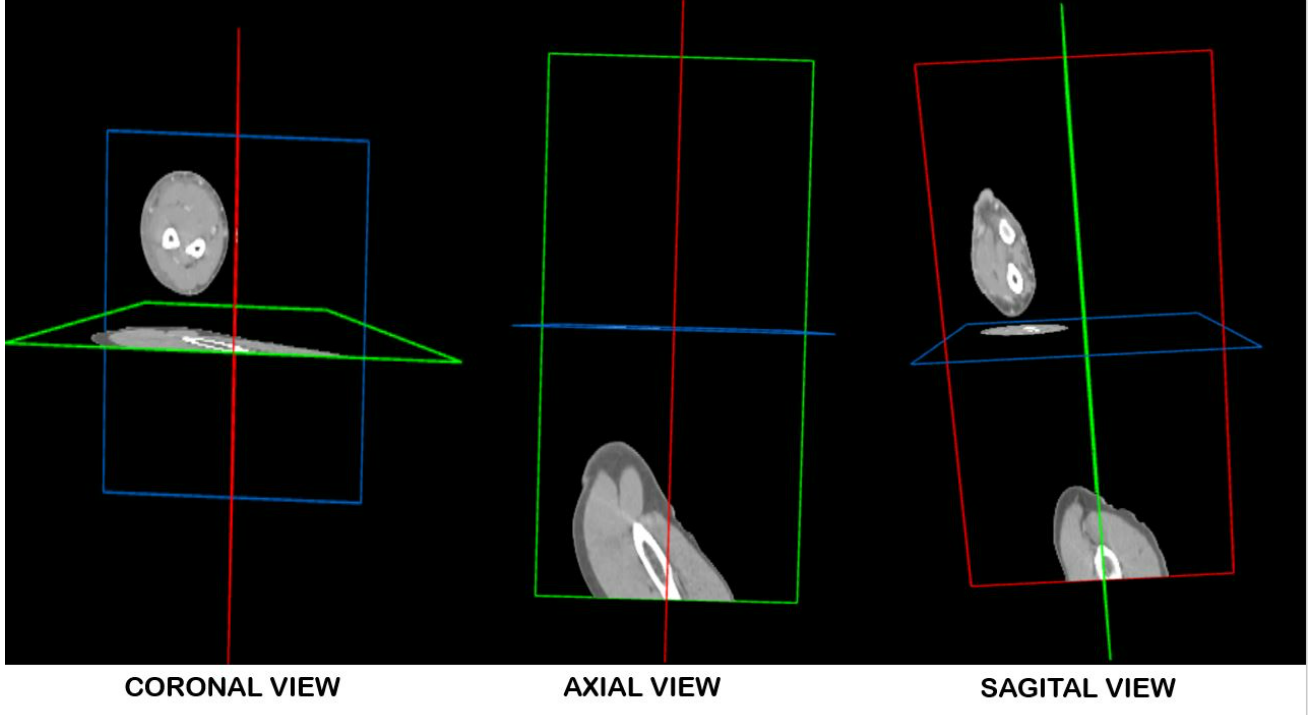

In [10]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [11]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

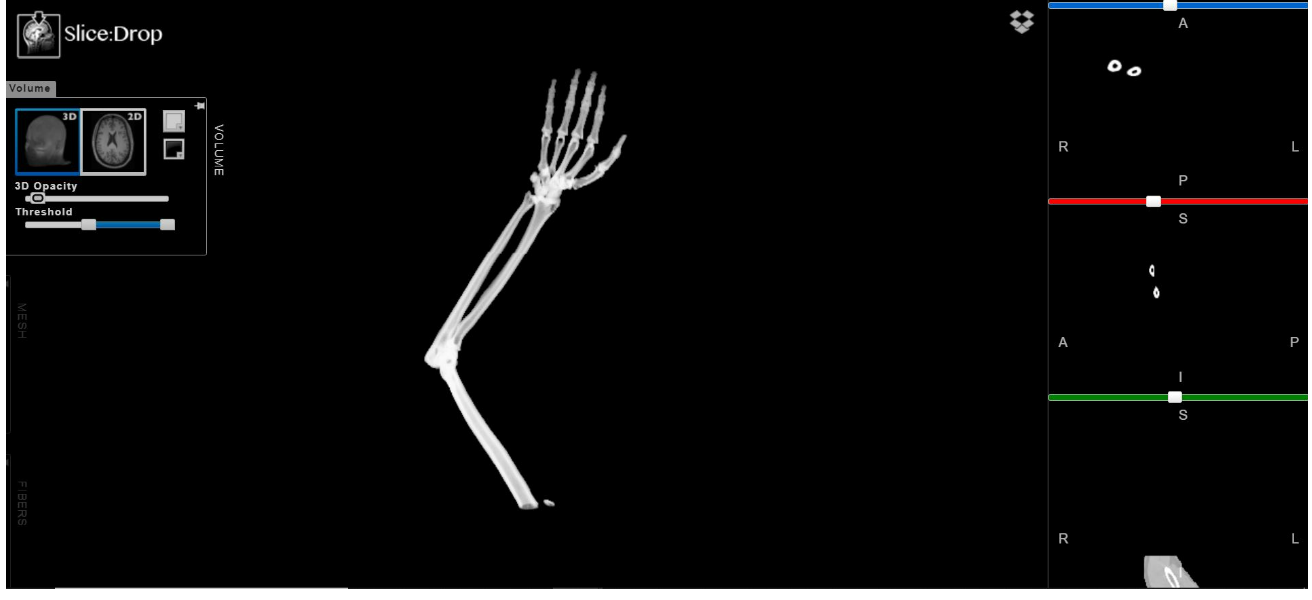

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [12]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [14]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread

In [17]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

import numpy as np
import os
from pydicom import dcmread

DICOM_Files_Path = "/content/ct/"

#This step lists the files in the directory and sorts them out similar to the 
#the files in Assignment_4
DICOM_Files = os.listdir(DICOM_Files_Path)
DICOM_Files = sorted(DICOM_Files)

#Reading the dimensions of a single(here, let it be first file) image slice to properly create the 3D numpy array.
#For First File
data_file_path = os.path.join(DICOM_Files_Path,DICOM_Files[0])

data = dcmread(data_file_path)       # using Hint 3

#Shape of respective data using .pixel_array.shape 
rows, columns = data.pixel_array.shape
total_files = len(DICOM_Files)
Padding_data = np.zeros((total_files,rows,columns))


for pixel,pixel_data in enumerate(DICOM_Files):
  pixel_data_path = os.path.join(DICOM_Files_Path,pixel_data)
  data_read = dcmread(pixel_data_path)
  Padding_data[pixel,:,:] = data_read.pixel_array
  

In [18]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

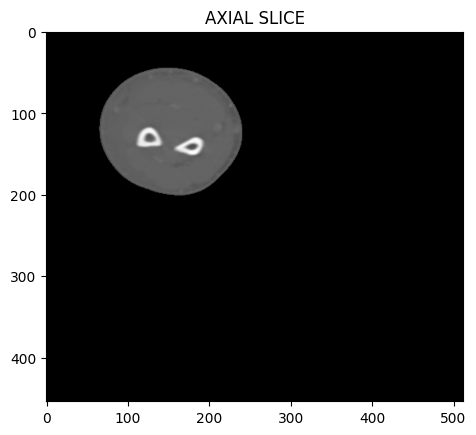

In [19]:
# TODO: YOUR CODE FOR AXIAL
Axial_Slice = Padding_data[Padding_data.shape[0]//2,:,:]

plt.imshow(Axial_Slice,cmap = 'gray')
plt.title('AXIAL SLICE')
plt.show()

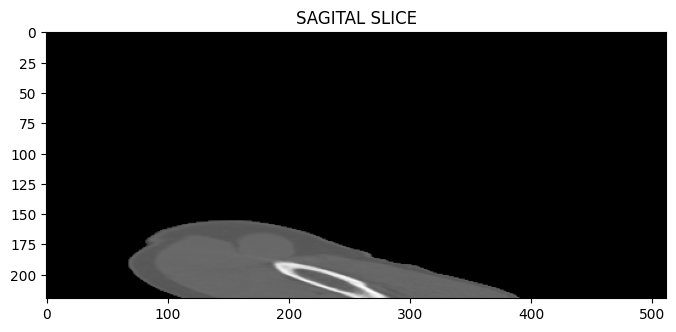

In [20]:
# TODO: YOUR CODE FOR SAGITTAL
Sagittal_Slice = Padding_data[:,Padding_data.shape[1]//2,:]

plt.figure(figsize=(8,6))
plt.imshow(Sagittal_Slice,cmap = 'gray')
plt.title('SAGITAL SLICE')
plt.show()
     

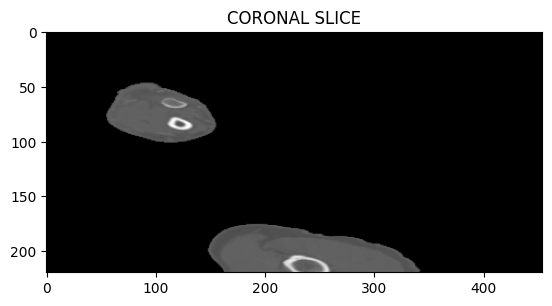

In [21]:
# TODO: YOUR CODE FOR CORONAL
Coronal_Slice = Padding_data[:,:,Padding_data.shape[2]//2]

plt.imshow(Coronal_Slice,cmap = 'gray')
plt.title('CORONAL SLICE')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [22]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [23]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

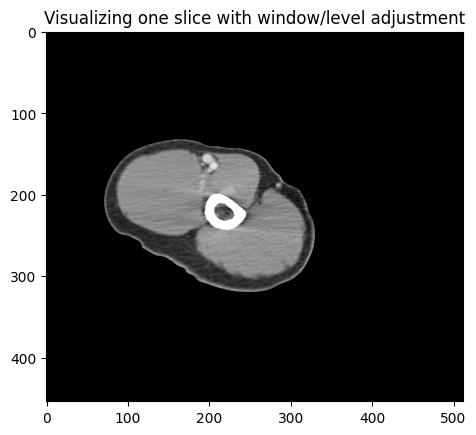

In [24]:
# TODO: YOUR CODE
# In this sample analysing slice number 201(i.e 200 in 0-200)

import pydicom
data_file_pixel = os.path.join(DICOM_Files_Path,DICOM_Files[200])

data = dcmread(data_file_pixel)     #reading data using dcm


Window_Center = data.get((0x0028, 0x1050)).value

Window_Width = data.get((0x0028, 0x1051)).value

if (0x0028, 0x1052) in data:
  Rescale_Intercept = data.get((0x0028, 0x1052)).value
else:
  Rescale_Intercept = 0
 

#Loading pixel data and applying Rescale Intercept with respect to Hounsfield Units
hu_pixels = data.pixel_array.astype(np.float32)

hu_pixels = hu_pixels * data.get((0x0028, 0x1053)).value + Rescale_Intercept

vmin1 = Window_Center - Window_Width/2

vmax1 = Window_Center + Window_Width/2

plt.imshow(hu_pixels, cmap='gray', vmin=vmin1, vmax=vmax1)
plt.title('Visualizing one slice with window/level adjustment')
plt.show()

In [25]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

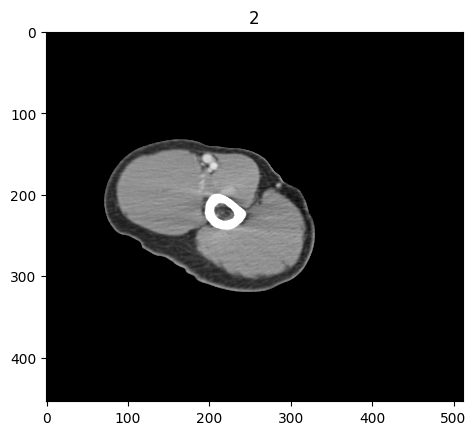

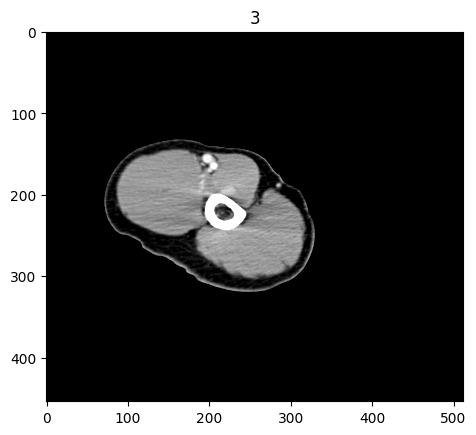

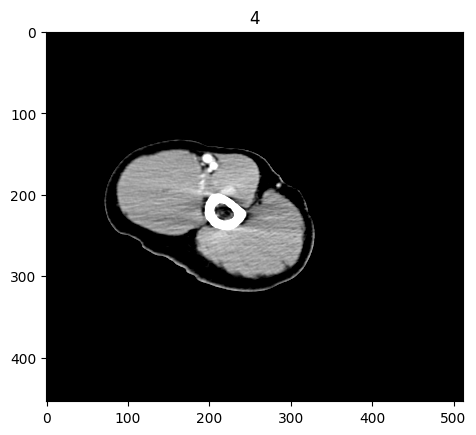

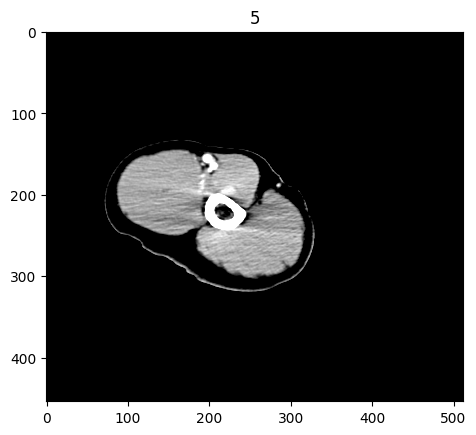

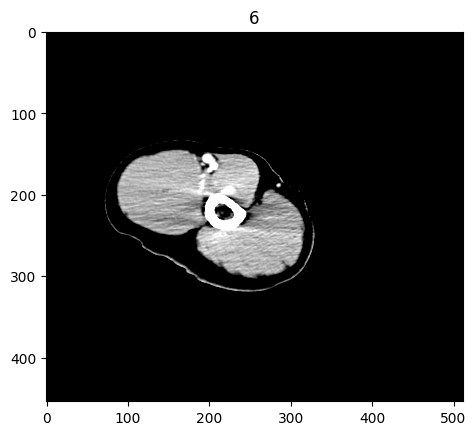

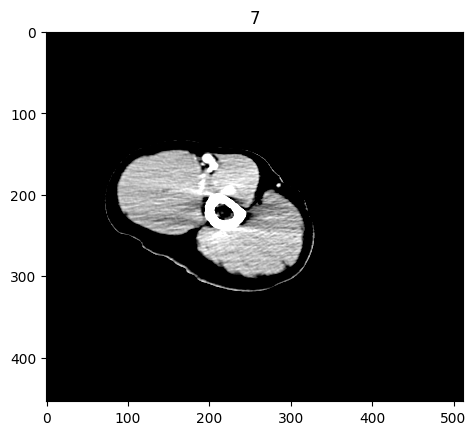

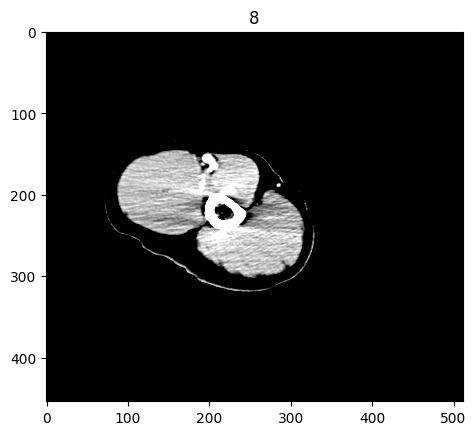

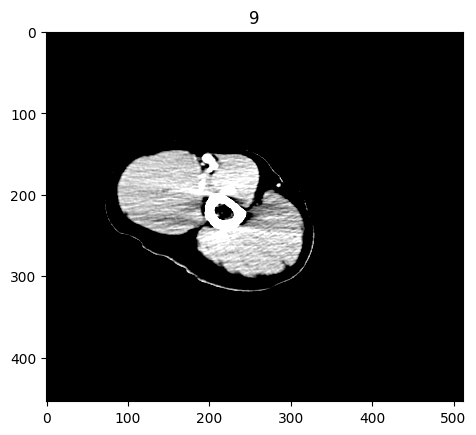

In [26]:
# TODO: YOUR CODE
import pydicom
data_file_pixel = os.path.join(DICOM_Files_Path,DICOM_Files[200])

data = dcmread(data_file_pixel)     #reading data using dcm


Window_Center = data.get((0x0028, 0x1050)).value

Window_Width = data.get((0x0028, 0x1051)).value

if (0x0028, 0x1052) in data:
  Rescale_Intercept = data.get((0x0028, 0x1052)).value
else:
  Rescale_Intercept = 0
 

#Loading pixel data and applying Rescale Intercept with respect to Hounsfield Units
hu_pixels = data.pixel_array.astype(np.float32)

hu_pixels = hu_pixels * data.get((0x0028, 0x1053)).value + Rescale_Intercept

for i in range(2,10):
  vmin2 = Window_Center - Window_Width/i

  vmax2= Window_Center + Window_Width/i

  plt.imshow(hu_pixels, cmap='gray', vmin=vmin2, vmax=vmax2)
  plt.title(i)
  plt.show()

In [27]:
# Which values make sense and why?

In [28]:
# TODO: YOUR ANSWER

# Since Vmin and Vmax are dependent on the Window/Leveling parameters and
# the final plot is dependent on hu_pixels, Vmin and Vmax. Hence to 
# "Increase" the contrast of the image we replace the denominator under Window_width 
# and also implement a for loop so as to to visualize the contrast change.
# Similarly to derease the contrast we can multiply the window_width by the respective factor.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [29]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones

# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

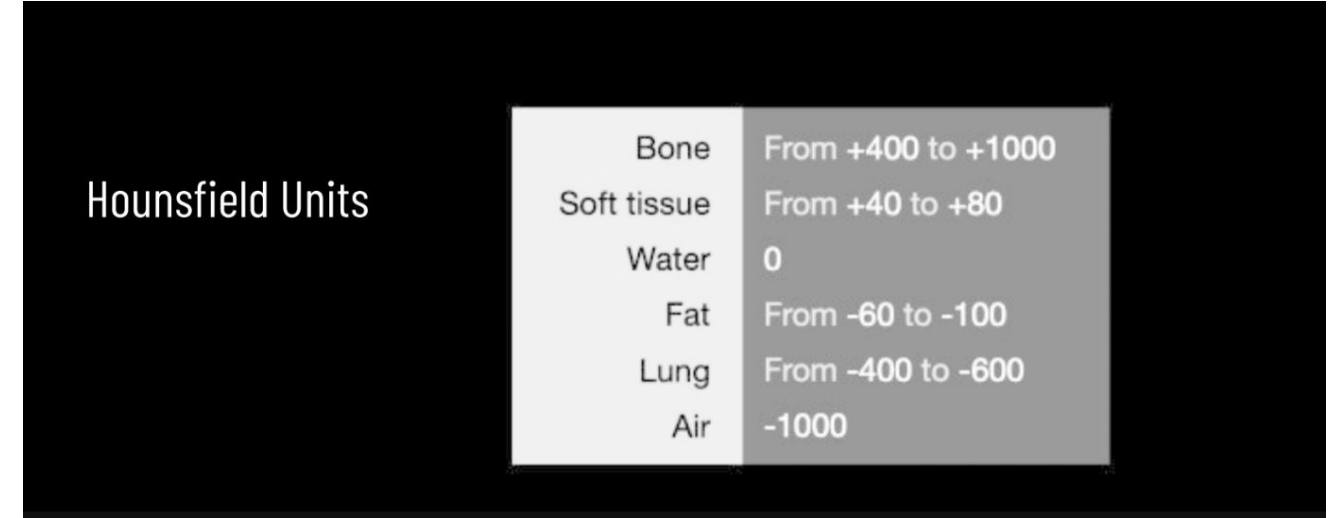

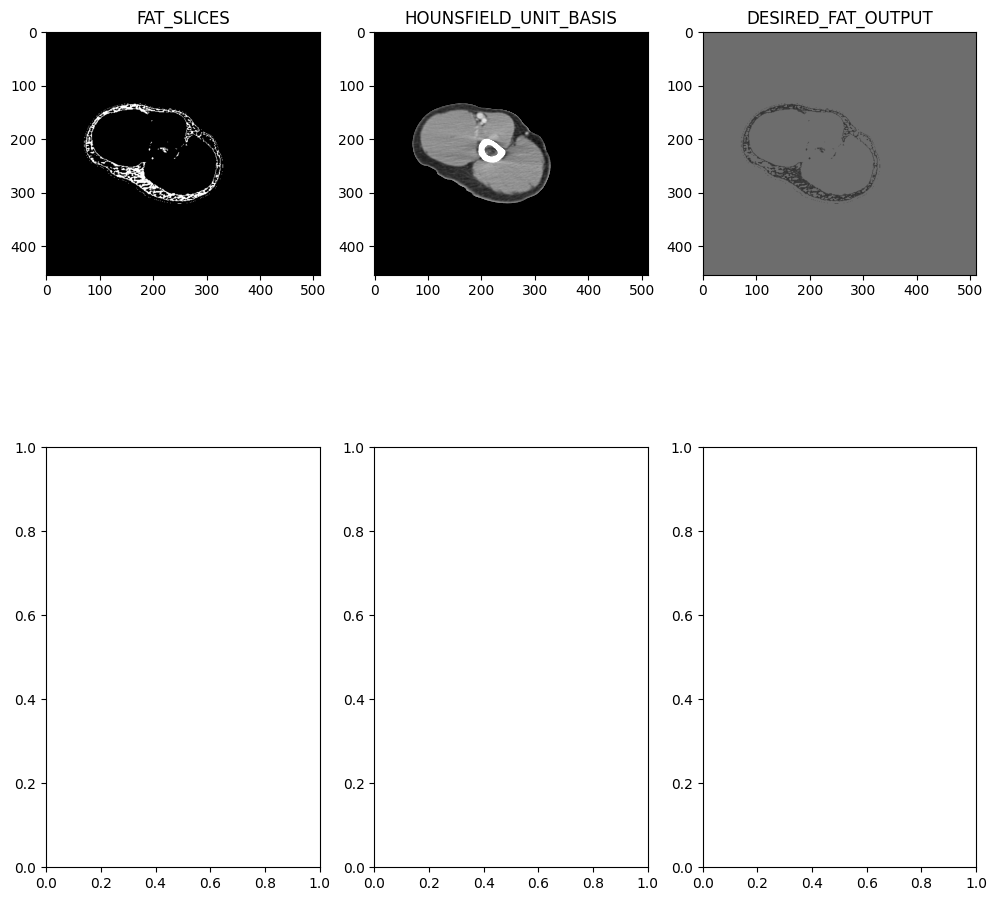

In [30]:
# TODO: YOUR CODE TO SEGMENT FAT

# Load DICOM file
data_file_pixel = os.path.join(DICOM_Files_Path,DICOM_Files[200])

data = dcmread(data_file_pixel)     #reading data using dcm

Window_Center = data.get((0x0028, 0x1050)).value

Window_Width = data.get((0x0028, 0x1051)).value

if (0x0028, 0x1052) in data:
  Rescale_Intercept = data.get((0x0028, 0x1052)).value
else:
  Rescale_Intercept = 0
 

#Loading pixel data and applying Rescale Intercept with respect to Hounsfield Units
hu_pixels = data.pixel_array.astype(np.float32)

hu_pixels = hu_pixels * data.get((0x0028, 0x1053)).value + Rescale_Intercept
hu_pixels = np.expand_dims(hu_pixels, axis=2)

vmin3 = Window_Center - Window_Width/2

vmax3 = Window_Center + Window_Width/2

# using Hint1 above
fat_mask = hu_pixels.copy()

#Referring to Slides HU range for FAT --> -60 to -100

#all values except in the range of -60 to -100 are set to zero
fat_mask[(fat_mask < -100) | (fat_mask > -60)] = 0
#all values in the range of -60 to -100 are set to one
fat_mask[fat_mask != 0] = 1


#using Hint and Hint 2 above
fat_mask = fat_mask.astype(np.int16)
fat_mask = fat_mask[:, :, np.newaxis] # np.newaxis to adjust the number of dimensions, i.e here add one
#now we have to use 3 slices to form a structure:
fig, axs = plt.subplots(2, 3, figsize=(12,12))


for i in range(0,fat_mask.shape[2],3):
    fat_slices = fat_mask[:,:,i:i*20+3]     # taking 3 slices at a time and showing the 20th slice after each iteration
    hu_slices = hu_pixels[:,:,i:i*20+3]
    #slight adjustment to accomodate
    axs[i//3, 0].imshow(np.squeeze(fat_slices), cmap='gray')
    axs[i//3, 0].set_title('FAT_SLICES')

    axs[i//3, 1].imshow(np.squeeze(hu_slices), cmap='gray', vmin=vmin3, vmax=vmax3)
    axs[i//3, 1].set_title('HOUNSFIELD_UNIT_BASIS')
    
    axs[i//3, 2].imshow(np.squeeze(hu_slices)*np.squeeze(fat_slices), cmap='gray', vmin=vmin3, vmax=vmax3)
    axs[i//3, 2].set_title('DESIRED_FAT_OUTPUT')


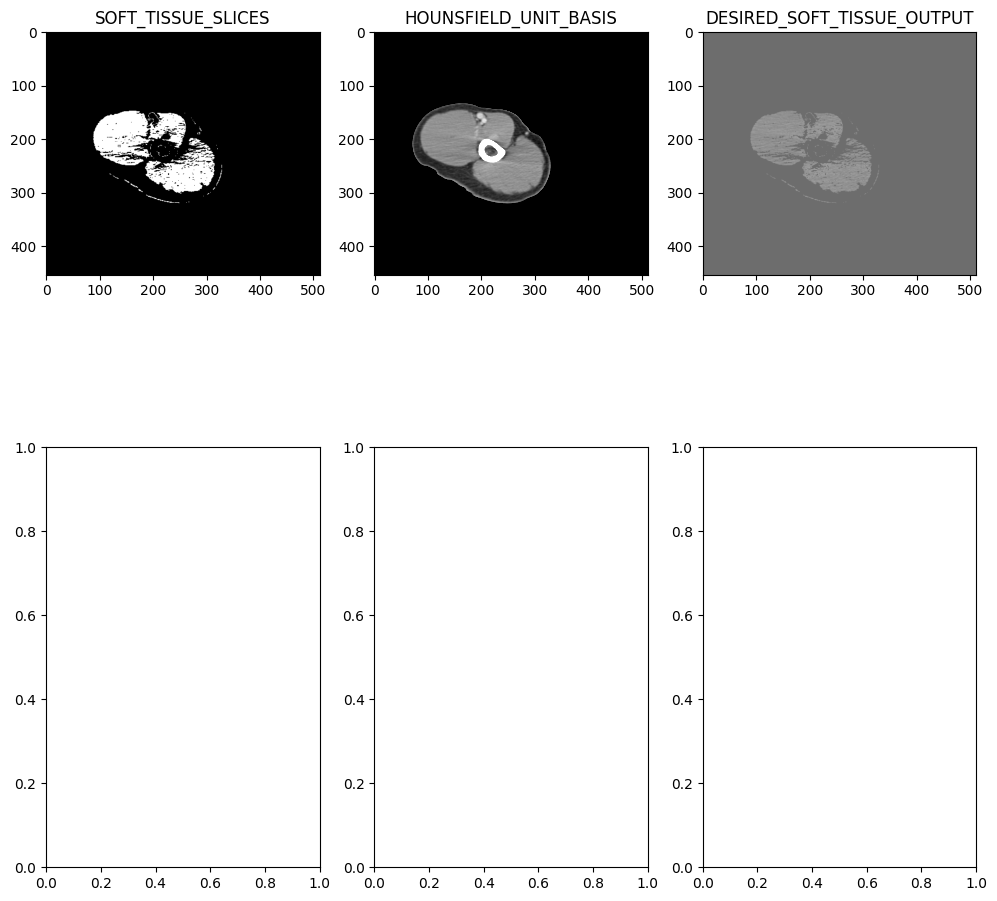

In [31]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE (The Program is similar to the previous FAT segmentation)

soft_tissue_mask = hu_pixels.copy()

#Referring to Slides HU range for SOFT_TISSUE --> 40 to 80

#all values except in the range of 40 to 80 are set to zero
soft_tissue_mask[(soft_tissue_mask < 40) | (soft_tissue_mask > 80)] = 0
#all values in the range of 40 to 80 are set to one
soft_tissue_mask[soft_tissue_mask != 0] = 1


#using Hint and Hint 2 above
soft_tissue_mask = soft_tissue_mask.astype(np.int16)
soft_tissue_mask = soft_tissue_mask[:, :, np.newaxis] # np.newaxis to adjust the number of dimensions, i.e here add one 

#now we have to use 3 slices to form a structure:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

for i in range(0,soft_tissue_mask.shape[2],3):
    soft_slices = soft_tissue_mask[:,:,i:i*20+3]     # taking 3 slices at a time and showing the 20th slice after each iteration
    hu_slices = hu_pixels[:,:,i:i*20+3]
    #slight adjustment to accomodate
    axs[i//3, 0].imshow(np.squeeze(soft_slices), cmap='gray')
    axs[i//3, 0].set_title('SOFT_TISSUE_SLICES')

    axs[i//3, 1].imshow(np.squeeze(hu_slices), cmap='gray', vmin=vmin3, vmax=vmax3)
    axs[i//3, 1].set_title('HOUNSFIELD_UNIT_BASIS')

    axs[i//3, 2].imshow(np.squeeze(hu_slices)*np.squeeze(soft_slices), cmap='gray', vmin=vmin3, vmax=vmax3)
    axs[i//3, 2].set_title('DESIRED_SOFT_TISSUE_OUTPUT')

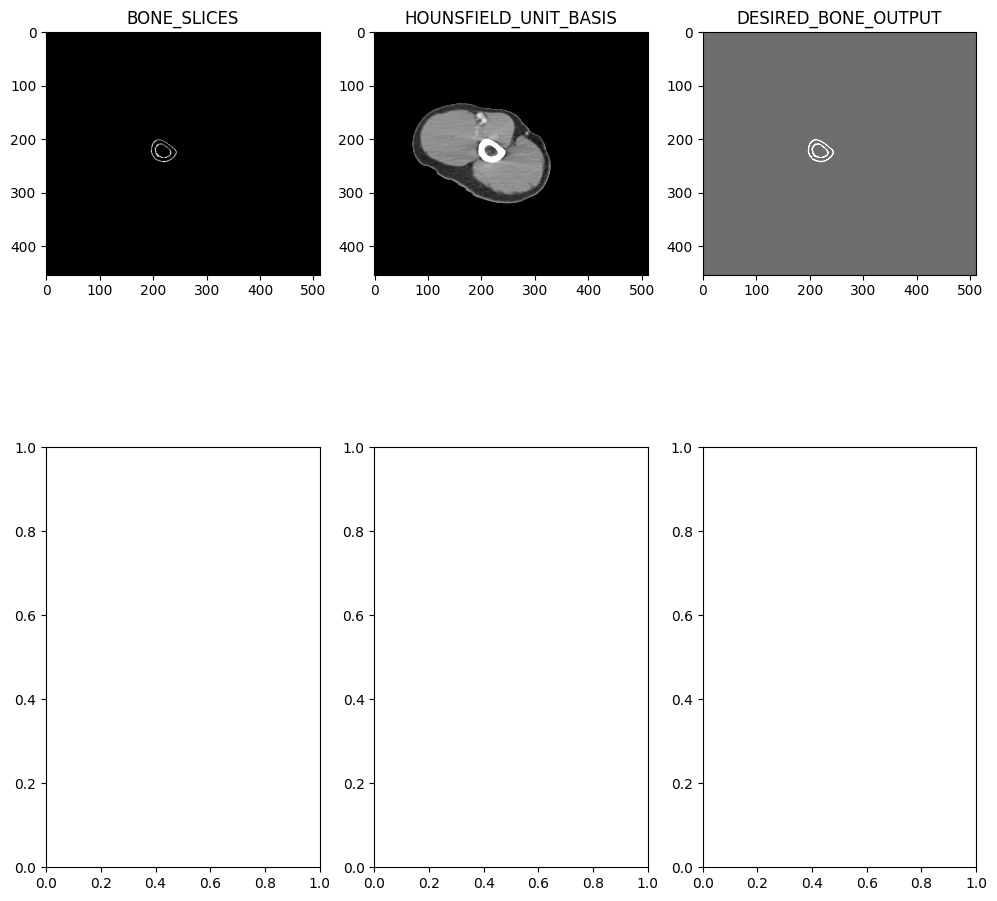

In [32]:
# TODO: YOUR CODE TO SEGMENT BONES (The Program is similar to the previous FAT segmentation)

bone_mask = hu_pixels.copy()

#Referring to Slides HU range for BONE --> 400 to 1000

#all values except in the range of 400 to 1000 are set to zero
bone_mask[(bone_mask < 400) | (bone_mask > 1000)] = 0
#all values in the range of 400 to 1000 are set to one
bone_mask[bone_mask != 0] = 1


#using Hint and Hint 2 above
bone_mask = bone_mask.astype(np.int16)
bone_mask = bone_mask[:, :, np.newaxis]

#now we have to use 3 slices to form a structure:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

for i in range(0,bone_mask.shape[2],3):
    bone_slices = bone_mask[:,:,i:i*20+3]  # taking 3 slices at a time and showing the 20th slice after each iteration
    hu_slices = hu_pixels[:,:,i:i*20+3]
    #slight adjustment to accomodate
    axs[i//3, 0].imshow(np.squeeze(bone_slices), cmap='gray')
    axs[i//3, 0].set_title('BONE_SLICES')

    axs[i//3, 1].imshow(np.squeeze(hu_slices), cmap='gray', vmin=vmin3, vmax=vmax3)
    axs[i//3, 1].set_title('HOUNSFIELD_UNIT_BASIS')

    axs[i//3, 2].imshow(np.squeeze(hu_slices)*np.squeeze(bone_slices), cmap='gray', vmin=vmin3, vmax=vmax3)
    axs[i//3, 2].set_title('DESIRED_BONE_OUTPUT')

In [33]:
# Are the segmentations good?

In [34]:
# TODO: YOUR ANSWER

# With respect to the outputs depicted above the segmentations seem good because whatever element
# of the ARM scan we wish to visualize, i.e FAT,SOFT_TISSUE,BONE , they all can be seen in their 
# respective desired ouputs.
# Although the output might not be perfect since these could be improvised by finding the best slice
# possible which would inculcate more data or information with respect to the scan.   
 

In [35]:
#==================== REFERENCES ==================================

#https://teachmeanatomy.info/the-basics/anatomical-terminology/planes/

#https://med.libretexts.org/Bookshelves/Anatomy_and_Physiology/Anatomy_and_Physiology_(Boundless)/1%3A_Introduction_to_Anatomy_and_Physiology/1.4%3A_Mapping_the_Body/1.4D%3A_Body_Planes_and_Sections

#https://www.geeksforgeeks.org/enumerate-in-python/

# AXIAL,CORONAL AND SAGITAL implementation:
#https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html

#https://pydicom.github.io/pydicom/dev/reference/generated/pydicom.dataset.Dataset.html

#https://www.geeksforgeeks.org/view-dicom-images-using-pydicom-and-matplotlib/

#https://pydicom.github.io/pydicom/dev/search.html?q=slice%5Bkey%5D.value&check_keywords=yes&area=default

#https://stackoverflow.com/questions/53837060/extract-sagittal-and-coronal-cuts-from-axial-view-using-pydicom

#https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

#https://vincentblog.xyz/posts/medical-images-in-python-computed-tomography

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

#https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

#https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis

#https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html


In [36]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""